<a href="https://colab.research.google.com/github/Dishant-S/ai-learning/blob/main/Car_or_plane_or_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai

In [ ]:
!pip install duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.3 MB/s eta 0:00:00


In [ ]:
from duckduckgo_search import DDGS

In [ ]:
from fastcore.all import *

In [ ]:
def search_images(searchTerm, max_images=200):
  print(f"Searching for '{searchTerm}'")
  return L(DDGS().images(searchTerm, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('cars', max_images=1)
urls[0]

Searching for 'cars'


'https://prod-ripcut-delivery.disney-plus.net/v1/variant/disney/9B368B465A4DC909CDB6E799ACB64899B54E731B6D894FA5B080D75DB2F30533/scale?aspectRatio=1.78&format=jpeg'

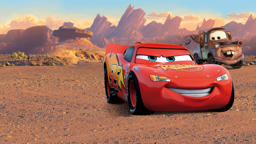

In [ ]:
from  fastdownload import download_url
dest = 'cars.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'aeroplane'


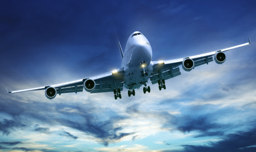

In [ ]:
download_url(search_images('aeroplane', max_images=1)[0], 'aeroplane.jpg', show_progress=False)
Image.open('aeroplane.jpg').to_thumb(256,256)

In [50]:
searches = 'car','aeroplane', 'forest'
path = Path('Car_or_aeroplane_or_forest')
from time import sleep

for o in searches :
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{o} photo'))
  time.sleep(3)
  resize_images(path/o, max_size=400, dest=path/o)

Searching for 'car photo'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'aeroplane photo'
Searching for 'forest photo'


In [51]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

15

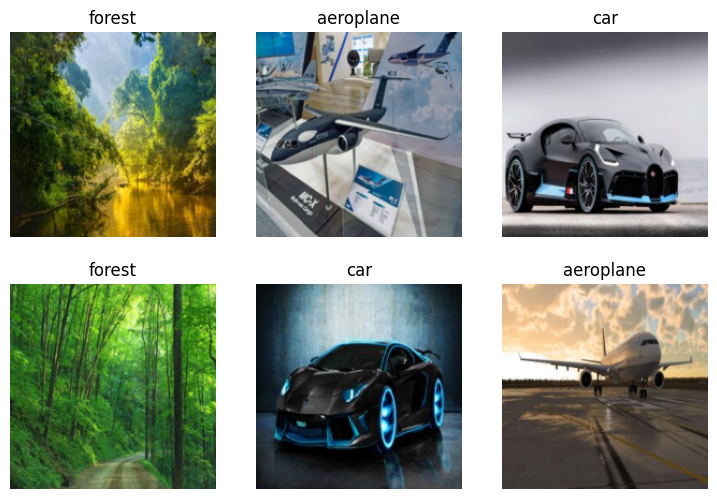

In [52]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [53]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.903702,0.134629,0.038462,01:02


epoch,train_loss,valid_loss,error_rate,time
0,0.088585,0.005924,0.000000,01:30
1,0.070779,0.010329,0.000000,01:28
2,0.045362,0.011944,0.000000,01:29


In [62]:
# For binary classification
im = Image.open(download_url(search_images('test', max_images=1)[0], 'don_knw.jpg', show_progress=False))
im.to_thumb(256,256)

category, _, probs = learn.predict(PILImage.create(im))
print(f"This is a: {category}")
print(f"Probability it's a {category}: {max(probs):.4f}")



Searching for 'test'


This is a: aeroplane
Probability it's a aeroplane: 0.9839
